In [ ]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


A1. If your project deals with a regression problem, please use one attribute of your dataset
(X_train) along with the target values (y_train) for training a linear regression model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
def load_dataset(path):
    return pd.read_csv(path)

def find_best_feature(df, target):
    correlations = df.corr()[target].drop(target).abs()
    return correlations.idxmax()

# Prepare training and test data
def prepare_data(df, feature, target, test_ratio=0.2, seed=42):
    X = df[[feature]]
    y = df[target]
    return train_test_split(X, y, test_size=test_ratio, random_state=seed)

# Train linear regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, model.predict(X_train)

# Execute workflow
if __name__ == "__main__":
    dataset_path = "data.csv"
    data = load_dataset(dataset_path)

    target = 'target'
    feature = find_best_feature(data, target)  # Update with actual feature
        # Update with actual target

    X_train, X_test, y_train, y_test = prepare_data(data, feature, target)
    model, predictions = train_model(X_train, y_train)

    print("Sample predictions:", predictions[:5])

Sample predictions: [0.22462825 0.77332714 0.22462825 0.77332714 0.22462825]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
def load_dataset(path):
    return pd.read_csv(path)



# Prepare training and test data
def prepare_data(df, feature, target, test_ratio=0.2, seed=42):
    X = df[[feature]]
    y = df[target]
    return train_test_split(X, y, test_size=test_ratio, random_state=seed)

# Train linear regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, model.predict(X_train)

# Execute workflow
if __name__ == "__main__":
    dataset_path = "data.csv"
    data = load_dataset(dataset_path)

    target = 'target'
    feature =  'thalach' # Update with actual feature
        # Update with actual target

    X_train, X_test, y_train, y_test = prepare_data(data, feature, target)
    model, predictions = train_model(X_train, y_train)

    print("Sample predictions:", predictions[:5])

Sample predictions: [0.34467174 0.53819374 0.24791074 0.33587529 0.37985756]


A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.
Perform prediction on the test data and compare the metric values between train and test set.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def load_data(file_path):
    return pd.read_csv(file_path)

# Find the feature most correlated with the target
def select_best_feature(data, target_column):
    correlations = data.corr()[target_column].drop(target_column).abs()
    return correlations.idxmax()

def split_data(data, feature_column, target_column, test_size=0.2, random_state=42):
    X = data[[feature_column]]
    y = data[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_regression_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def compute_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = mse ** 0.5
    mape = (abs((actual - predicted) / actual)).mean() * 100
    r2 = r2_score(actual, predicted)
    return mse, rmse, mape, r2

if __name__ == "__main__":

    file_path = "data.csv"
    dataset = load_data(file_path)

    target = 'target'
    best_feature = select_best_feature(dataset, target)

    X_train, X_test, y_train, y_test = split_data(dataset, best_feature, target)

    model = train_regression_model(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train, rmse_train, mape_train, r2_train = compute_metrics(y_train, y_train_pred)
    mse_test, rmse_test, mape_test, r2_test = compute_metrics(y_test, y_test_pred)

    print(f"Best Feature Selected: {best_feature}")

    print("\nTraining Data Evaluation:")
    print(f"  MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAPE: {mape_train:.2f}%, R²: {r2_train:.4f}")

    print("\nTest Data Evaluation:")
    print(f"  MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.2f}%, R²: {r2_test:.4f}")


Best Feature Selected: thal

Training Data Evaluation:
  MSE: 0.1788, RMSE: 0.4229, MAPE: inf, R²: 0.2797

Test Data Evaluation:
  MSE: 0.1802, RMSE: 0.4245, MAPE: inf%, R²: 0.2419


A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


def load_data(file_path):
    return pd.read_csv(file_path)


def select_features(data, target_column):
    return data.drop(columns=[target_column])


def split_data(data, feature_columns, target_column, test_size=0.2, random_state=42):
    X = data[feature_columns]
    y = data[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_regression_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def compute_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = mse ** 0.5
    r2 = r2_score(actual, predicted)

    # Handle zero values in actual data for MAPE calculation
    nonzero_actual = actual[actual != 0]
    nonzero_predicted = predicted[actual != 0]

    if len(nonzero_actual) > 0:
        mape = (abs((nonzero_actual - nonzero_predicted) / nonzero_actual)).mean() * 100
    else:
        mape = np.nan  # Not computable if all values are zero

    return mse, rmse, mape, r2

if __name__ == "__main__":

    file_path = "data.csv"
    dataset = load_data(file_path)

    target = 'target'
    features = select_features(dataset, target)  # Select all features except target

    X_train, X_test, y_train, y_test = split_data(dataset, features.columns, target)


    model = train_regression_model(X_train, y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    mse_train, rmse_train, mape_train, r2_train = compute_metrics(y_train, y_train_pred)
    mse_test, rmse_test, mape_test, r2_test = compute_metrics(y_test, y_test_pred)


    print(f"Using Features: {list(features.columns)}")

    print("\nTraining Data Evaluation:")
    print(f"  MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAPE: {mape_train:.2f}%, R²: {r2_train:.4f}")

    print("\nTest Data Evaluation:")
    print(f"  MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.2f}%, R²: {r2_test:.4f}")


Using Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Training Data Evaluation:
  MSE: 0.1161, RMSE: 0.3407, MAPE: 29.76%, R²: 0.5325

Test Data Evaluation:
  MSE: 0.1078, RMSE: 0.3284, MAPE: 37.34%, R²: 0.5463


A4. Perform k-means clustering on your data. Please remove / ignore the target variable for
performing clustering. S

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

def load_dataset(filepath):
    """ Reads data from a CSV file and returns a DataFrame. """
    return pd.read_csv(filepath)

def preprocess_data(data, target_column, test_size=0.2, random_state=42):
    """ Removes the target column and splits data into training and testing sets. """
    X = data.drop(columns=[target_column])  # Exclude target variable
    X_train, X_test = train_test_split(X, test_size=test_size, random_state=random_state)
    return X_train, X_test

# Apply K-Means clustering
def perform_kmeans(X_train, clusters=2, seed=0):
    """ Performs K-Means clustering and returns cluster labels and centers. """
    kmeans = KMeans(n_clusters=clusters, random_state=seed, n_init="auto")
    kmeans.fit(X_train)
    return kmeans.labels_, kmeans.cluster_centers_

# Main workflow
if __name__ == "__main__":
    filepath = "data.csv"  # Update with actual file path
    target_col = "target"  # Update with the correct target column

    # Load and preprocess data
    df = load_dataset(filepath)
    X_train, X_test = preprocess_data(df, target_col)

    # Execute clustering
    labels, centers = perform_kmeans(X_train, clusters=2)

    # Display results
    print("First 10 Cluster Labels:", labels[:10])
    print("Cluster Centers:\n", centers)


First 10 Cluster Labels: [1 1 0 0 0 1 1 1 0 0]
Cluster Centers:
 [[5.33405797e+01 7.60869565e-01 2.13768116e+00 1.29137681e+02
  2.20688406e+02 1.37681159e-01 9.34782609e-01 1.51391304e+02
  3.18840580e-01 1.09202899e+00 5.65217391e-01 5.86956522e-01
  1.84057971e+00]
 [5.72820513e+01 5.89743590e-01 2.25641026e+00 1.36423077e+02
  3.02282051e+02 1.28205128e-01 1.21794872e+00 1.44987179e+02
  4.10256410e-01 1.10769231e+00 6.53846154e-01 8.58974359e-01
  1.87179487e+00]]


A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load dataset from CSV
def read_data(file_path):
    """Loads data from a CSV file into a pandas DataFrame."""
    return pd.read_csv(file_path)

# Prepare dataset for clustering
def prepare_clustering_input(data, target_col, test_fraction=0.2, random_seed=42):
    """Removes the target column and splits the dataset into training and testing subsets."""
    features = data.drop(columns=[target_col])  # Drop target variable
    return train_test_split(features, test_size=test_fraction, random_state=random_seed)

# Apply K-Means algorithm
def apply_kmeans(train_data, num_clusters=2, random_seed=42):
    """Trains a K-Means clustering model and returns the trained model."""
    model = KMeans(n_clusters=num_clusters, random_state=random_seed, n_init="auto")
    model.fit(train_data)
    return model

# Compute clustering quality metrics
def compute_clustering_metrics(train_data, cluster_labels):
    """Calculates and returns Silhouette Score, CH Score, and DB Index."""
    sil_score = silhouette_score(train_data, cluster_labels)
    ch_score = calinski_harabasz_score(train_data, cluster_labels)
    db_index = davies_bouldin_score(train_data, cluster_labels)
    return sil_score, ch_score, db_index

# Main execution flow
if __name__ == "__main__":
    data_file = "data.csv"  # Update with actual file path
    target_feature = "target"  # Update with the correct target column

    # Load and process data
    dataset = read_data(data_file)
    X_train, X_test = prepare_clustering_input(dataset, target_feature)

    # Perform clustering
    kmeans_result = apply_kmeans(X_train, num_clusters=2)

    # Evaluate clustering
    sil_score, ch_score, db_index = compute_clustering_metrics(X_train, kmeans_result.labels_)

    # Display results
    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Calinski-Harabasz Score: {ch_score:.4f}")
    print(f"Davies-Bouldin Index: {db_index:.4f}")


Silhouette Score: 0.3928
Calinski-Harabasz Score: 167.1950
Davies-Bouldin Index: 0.9744


A6. Perform k-means clustering for different values of k. Evaluate the above scores for each k value.
Make a plot of the values against the k value to determine the optimal cluster count.

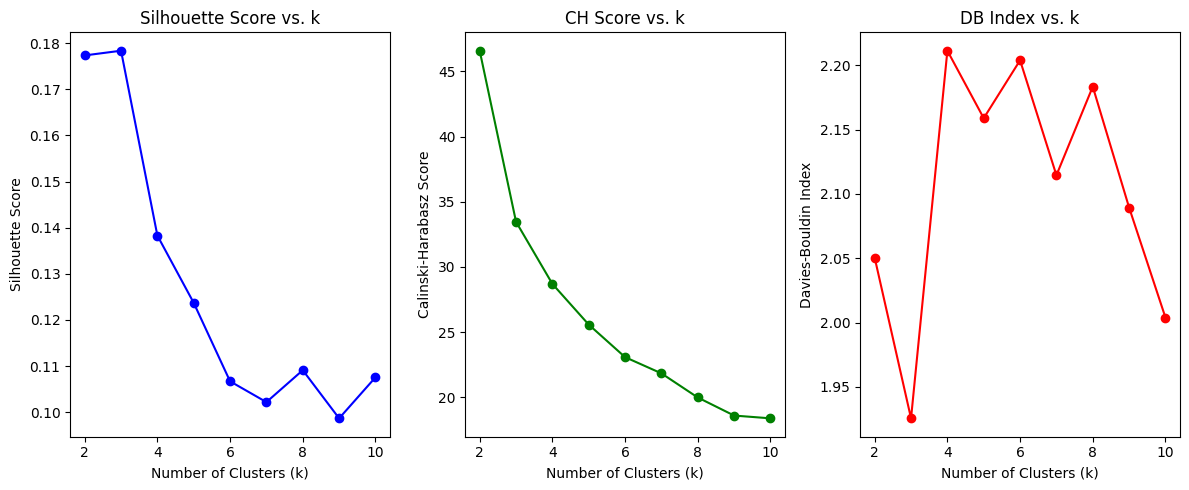

Optimal k based on highest Silhouette Score: 3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
def read_data(file_path):
    """Loads data from a CSV file into a pandas DataFrame."""
    return pd.read_csv(file_path)

# Prepare dataset for clustering
def prepare_clustering_input(data, target_col, test_fraction=0.2, random_seed=42):
    """Removes the target column, scales the data, and splits into training and testing subsets."""
    features = data.drop(columns=[target_col])  # Drop target variable
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)  # Standardizing features
    return train_test_split(features_scaled, test_size=test_fraction, random_state=random_seed)

# Apply K-Means for different values of k
def evaluate_kmeans(X_train, k_values, random_seed=42):
    """Performs k-means clustering for different k values and computes evaluation metrics."""
    silhouette_scores = []
    ch_scores = []
    db_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init="auto")
        kmeans.fit(X_train)
        labels = kmeans.labels_

        silhouette_scores.append(silhouette_score(X_train, labels))
        ch_scores.append(calinski_harabasz_score(X_train, labels))
        db_scores.append(davies_bouldin_score(X_train, labels))

    return silhouette_scores, ch_scores, db_scores

# Plot evaluation scores against k-values
def plot_clustering_scores(k_values, silhouette_scores, ch_scores, db_scores):
    """Plots the clustering evaluation metrics against k-values to determine the optimal number of clusters."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score vs. k")

    plt.subplot(1, 3, 2)
    plt.plot(k_values, ch_scores, marker='o', linestyle='-', color='g')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Calinski-Harabasz Score")
    plt.title("CH Score vs. k")

    plt.subplot(1, 3, 3)
    plt.plot(k_values, db_scores, marker='o', linestyle='-', color='r')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Davies-Bouldin Index")
    plt.title("DB Index vs. k")

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    data_file = "data.csv"  # Update with actual file path
    target_feature = "target"  # Update with the correct target column

    # Load and preprocess data
    dataset = read_data(data_file)
    X_train, X_test = prepare_clustering_input(dataset, target_feature)

    # Define k-values range
    k_values = range(2, 11)  # Testing k from 2 to 10

    # Perform clustering and evaluate metrics
    silhouette_scores, ch_scores, db_scores = evaluate_kmeans(X_train, k_values)

    # Plot evaluation metrics
    plot_clustering_scores(k_values, silhouette_scores, ch_scores, db_scores)

    # Print best k based on silhouette score
    best_k = k_values[np.argmax(silhouette_scores)]
    print(f"Optimal k based on highest Silhouette Score: {best_k}")


A7. Using elbow plot, determine the optimal k value for k-means clustering. Use below code

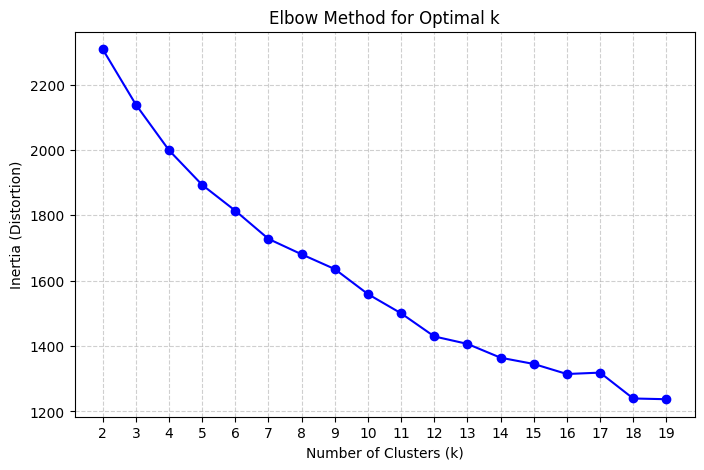

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
def read_data(file_path):
    """Loads data from a CSV file into a pandas DataFrame."""
    return pd.read_csv(file_path)

# Prepare dataset for clustering
def prepare_clustering_input(data, target_col, test_fraction=0.2, random_seed=42):
    """Removes the target column, scales the data, and splits into training and testing subsets."""
    features = data.drop(columns=[target_col])  # Drop target variable
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)  # Standardizing features
    return train_test_split(features_scaled, test_size=test_fraction, random_state=random_seed)

# Compute distortions for different k values
def compute_elbow_method(X_train, k_range):
    """Calculates distortions (inertia) for different k values in k-means clustering."""
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
        kmeans.fit(X_train)
        distortions.append(kmeans.inertia_)  # Inertia = sum of squared distances to closest centroid
    return distortions

# Plot the elbow curve
def plot_elbow_curve(k_values, distortions):
    """Plots the elbow method to determine the optimal k value."""
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, distortions, marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Distortion)")
    plt.title("Elbow Method for Optimal k")
    plt.xticks(k_values)
    plt.grid(alpha=0.6, linestyle="--")
    plt.show()

# Main execution
if __name__ == "__main__":
    data_file = "data.csv"  # Update with actual file path
    target_feature = "target"  # Update with the correct target column

    # Load and preprocess data
    dataset = read_data(data_file)
    X_train, X_test = prepare_clustering_input(dataset, target_feature)

    # Define k-values range for elbow method
    k_values = range(2, 20)

    # Compute distortions
    distortions = compute_elbow_method(X_train, k_values)

    # Plot elbow curve
    plot_elbow_curve(k_values, distortions)
